<a href="https://colab.research.google.com/github/ewattudo/vis1/blob/main/PS6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

i like the idea of sankey for your data; it is about flows (of students)
and yes sankey may cause many sleepless nights BUT not that bad if you start simple, especially with type of data where **each source has only one target** (target can have multiple sources), so may subset/simplify your data to such condition first,
and then just follow this simple example:
https://colab.research.google.com/github/theaok/vis/blob/main/plotly.ipynb#scrollTo=Hx8qCcntI1m9
<br><br>

in addition to pulling data automatically from database, likewise can have graphs exported automatically and updated say on
grad school website--eg can ask IT folks say to create an iframe like:



`<iframe id="igraph" scrolling="no" style="border:none;" seamless="seamless" src="https://theaok.github.io/junk/sc.html" height="600" width="900"></iframe>`

and the iframe will feed from your github page (that can be updated autmatically from within python) and the result is:
https://theaok.github.io/junk/scEm.html

<br><br>

why intl-> camden and nj->nb?
intl think ru is ru; nj thinks nb is the real deal?
<br><br>

great admin data and great insights!
but again, for future research combine with other data such as census, survey etc--could be a topic for dissertation :)

# Setup and Upload Files
Run this for data and setup code. 

## Setup

In [2]:
#---------------------------SETUP----------------------------------
#get useful libraries
import time, os, sys, re #basics
import zipfile, json, datetime, string   #string for annotating points in scatter 
import numpy as np #basic math
from statistics import * #stats

!pip install squarify
import squarify 

!pip install adjustText 
from adjustText import adjust_text

import matplotlib.pyplot as plt #import pylab as plt #apparently discouraged now: 
 #https://stackoverflow.com/questions/11469336/what-is-the-difference-between-pylab-and-pyplot
 #https://www.tutorialspoint.com/matplotlib/matplotlib_pylab_module.htm

import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler
#s4 = Styler(df4, uuid_len=0, cell_ids=False)

import urllib  #weird, guess need to have os and pandas imported for this to work  %TODO/LATER ditch it, its weird anyway, just use wget/curl                                                 

from google.colab import files

#import webbrowser                                                                                                           

import seaborn as sns

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

#many tricks how to extend notebook functionality
#https://coderzcolumn.com/tutorials/python/list-of-useful-magic-commands-in-jupyter-notebook-lab
#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#MAGICS and THEMES/STYLES: important! does affect not just shading/colors, but also fonts, spacing, etc
#(even if you only select default (v not selecting anything) [but does seem to work better if you do make explicit sleections]) 

###magics: https://ipython.readthedocs.io/en/stable/interactive/magics.html
#most essential setup for vis: it does affect vis! careful!! stick with inline, maybe notebook; others mostly for non-notebook, eg spyder environ
#https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html recomends *inline*!
#show current one:
#%matplotlib 
#%matplotlib --list 
#interactive plots:
#%matplotlib notebook  
#static images of your plot:
%matplotlib inline 
#may play with this one and other magics (btw default is probably agg)
#%matplotlib nbagg

###themes/styles: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
#https://jakevdp.github.io/PythonDataScienceHandbook/04.11-settings-and-stylesheets.html
#https://matplotlib.org/stable/tutorials/introductory/customizing.html
#here more about art and style than under the hood functionality as with magics, explore and experiment
#many may find 'default' or seaborn ones more pleasing; my fav 'classic' is back from 90s ;) 
#plt.style.available #list available styles :) may install more
#plt.style.use('default') # more delicate subtle than classic
plt.style.use('default')  #  'seaborn-whitegrid' 'seaborn-white' 'seaborn-poster'
# btw: magics v theme/style sequence matters, eg if i specify classic style before inline magic, i wouldnt get grey bounding box im getting

#wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image

#aok its a mess; this is already loaded earerlier!
import pandas as pd
import numpy as np
%matplotlib inline 
import plotly.express as px #a quick simple one
import plotly.graph_objects as go #can get convoluted


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Data Upload

### Camden Comparison

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ewattudo/vis1/main/CompReports.csv", "comps")

('comps', <http.client.HTTPMessage at 0x7f4a05af9790>)

In [ ]:
os.getcwd() #pwd
os.listdir() #compare to clicking on the left the folder icon #dir

'/content'

['.config', 'comps', 'sample_data']

In [ ]:
comps=pd.read_csv('comps')

### Rutgers Comparison

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ewattudo/vis1/main/CampCompReports.csv", "campcomps")

('campcomps', <http.client.HTTPMessage at 0x7f4a05b05310>)

In [ ]:
campcomps=pd.read_csv('campcomps')

### Program Pipeline

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ewattudo/vis1/main/ProgramDetails.csv", "programs")

('programs', <http.client.HTTPMessage at 0x7f4a05af9730>)

In [ ]:
programs=pd.read_csv('programs')

### Year Over Year Data

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ewattudo/vis1/main/YoYCompReports.csv", "yoy")

('yoy', <http.client.HTTPMessage at 0x7f4a05b010d0>)

In [ ]:
yoy=pd.read_csv('yoy')

### Fall 2023 Application Data

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ewattudo/vis1/main/Fall23AppData.csv", "fallapps")

('fallapps', <http.client.HTTPMessage at 0x7f4a05b05850>)

In [ ]:
fall=pd.read_csv('fallapps')

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ewattudo/vis1/main/race.csv", "race")

('race', <http.client.HTTPMessage at 0x7f4a05b01880>)

In [ ]:
race=pd.read_csv('race')

### Names

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ewattudo/vis1/main/Names.csv", "namel")

('namel', <http.client.HTTPMessage at 0x7f49d931dcd0>)

In [ ]:
namel=pd.read_csv('namel')
namel.head(3)

,LastName
0,Manduri
1,Schwartz
2,Olorunseyi


In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ewattudo/vis1/main/Program%20AC.csv", "AC")

('AC', <http.client.HTTPMessage at 0x7f49d931da00>)

In [ ]:
AC=pd.read_csv('AC')
AC.head(3)

,Program,Total AC,Percent International,Category
0,Biology,12,66.7,STEM
1,Biology: Computational and Integrative,16,62.5,STEM
2,Business and Science,1,100.0,STEM


In [35]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ewattudo/vis1/main/pipeline.csv", "pipe")

('pipe', <http.client.HTTPMessage at 0x7fe9506f0790>)

In [36]:
pipe=pd.read_csv('pipe')
pipe.head(5)

,index,label,source,target,value
0,0,Started,0.0,15.0,373.0
1,1,Submitted,0.0,1.0,1160.0
2,2,Incomplete,1.0,2.0,149.0
3,3,Complete,1.0,3.0,1011.0
4,4,Under Committee Review,3.0,4.0,385.0


### cross checks

In [ ]:
#aok do it for all main vars of interest
fall.head(3)
fall.info()
fall.Race.value_counts(dropna=False)

,Age,Gender,Race,Domestic,Country,State,Program,Status,Index
0,27,Male,Asian,International,India,Andhra Pradesh,Biology: Computational and Integrative (MS),Unsubmitted,1
1,26,Male,White,Domestic,United States,New Jersey,Biology: Computational and Integrative (MS),Unsubmitted,2
2,32,Male,Black or African American,International,Nigeria,Ogun,Biology: Computational and Integrative (MS),Unsubmitted,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Age       1235 non-null   int64 
 1   Gender    1235 non-null   object
 2   Race      1235 non-null   object
 3   Domestic  1235 non-null   object
 4   Country   1235 non-null   object
 5   State     1234 non-null   object
 6   Program   1235 non-null   object
 7   Status    1235 non-null   object
 8   Index     1235 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 87.0+ KB


Asian                                                                                   538
White                                                                                   319
Black or African American                                                               227
None Listed                                                                              70
Hispanic or Latino                                                                       28
Hispanic or Latino; White                                                                14
Asian; White                                                                             13
Black or African American; White                                                          7
Black or African American; Hispanic or Latino                                             6
American Indian or Alaska Native                                                          3
Asian; Native Hawaiian or Other Pacific Islander                                

# Graduate Admissions Dashboard

This project was designed to tell the story of graduate admissions on the Camden campus for fall 2023. It is split into two sections:

1.   Comparing the graduate performance
2.   Identifying who has applied




## Comparing the Number of Commits
 Against Camden and Against Rutgers Graduate Schools 

1.   Year Over Year
2.   Camden
3. Rutgers Graduate 

###Year over Year

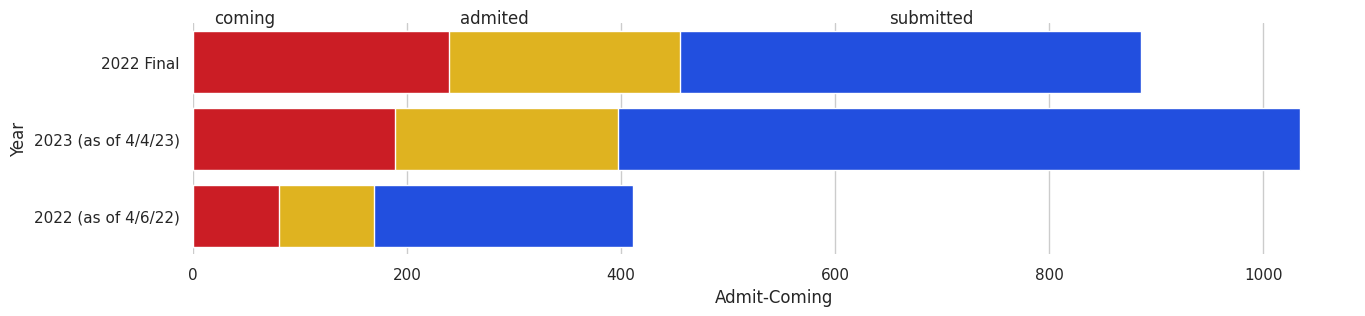

In [ ]:
#aok all good; but maybe could ditch legend and label with plt.text more cleanly
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 3))

# Plot the total apps
sns.set_color_codes("bright")
sns.barplot(x="Submitted", y="Year", data=yoy,
            label="Total Submitted Apps", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("bright")
sns.barplot(x="Admitted", y="Year", data=yoy,
            label="Admitted Students", color="y")

# Plot the crashes where alcohol was involved
sns.set_color_codes("bright")
sns.barplot(x="Admit-Coming", y="Year", data=yoy,
            label="Admitted Students Who Accepted Offer", color="r")

# Add a legend and informative axis label
#ax.legend(ncol=2, loc="lower right", frameon=True)
#ax.set(xlim=(0, 1100), ylabel="",
#       xlabel="Graduates School Camden - Year Over Year Comparison: Number of Applications by Status")

plt.text(20,-.5,'coming')
plt.text(250,-.5,'admited')
plt.text(650,-.5,'submitted')


sns.despine(left=True, bottom=True);

The graduate school is experiencing unprecedented growth in the number of applications. As of April 5, we have more applications than last cycle and that we nearly have as many admitted students as we had total applications a year ago. 

It should be noted that it is very early in the recruitment cycle and the numbers reported here are leading indicators to matriculation. 

In [6]:
pipe.head(3)

,index,label,source,target,value
0,0,Unsubmitted,0.0,14.0,374.0
1,1,Incomplete,0.0,15.0,148.0
2,2,Review,0.0,3.0,1011.0


In [40]:
fig = go.Figure(data=[go.Sankey(
    node = dict(
      thickness = 15,
      line = dict(color = "red", width = 1),
      label = pipe.label,
      color = "blue"
    ),
    link = dict(
          
      # indices correspond to labels!!!
      source = pipe.source, 
      target = pipe.target,
      value  = pipe.value
  ))])
  
fig.show()

In [ ]:
fig = px.treemap(AC, path=[px.Constant("Graduate School"), 'Category', 'Program'], values='Total AC',
                  color='Percent International', hover_data=['Program'],
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(AC['Percent International'], weights=AC['Total AC']))
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))

##Reviewing Pipeline by Program to Determine Next Steps

aok actually one of my fav, this one;  
can also do as perc of tot: eg psy has many under review BUT also it has a big total!

and can have such type of graphs for other stuff like intl v PA applications

and not just admiting but also stuff like:  GPA, dropouts, awards, etc etc

!! and could add complexity further! say have 2 markers for each program and category; say circle for males and triangle for females; or intl/domestic etc etc

indeed this type of chart can be a true bread and butter for your type of work

In [ ]:
programs[['Program','Admit']] #aok just quick double check with table

,Program,Admit
0,Biology (MS),3
1,Biology: Computational and Integrative (MS),0
2,Biology: Computational and Integrative (PHD),4
3,Business and Science - Computer and Informatio...,1
4,Chemistry (MS),1
5,Childhood Studies (MA),1
6,Childhood Studies (PHD),13
7,Computer Science: Scientific Computing (MS),4
8,Creative Writing (MFA) Camden,5
9,Criminal Justice (MA),0


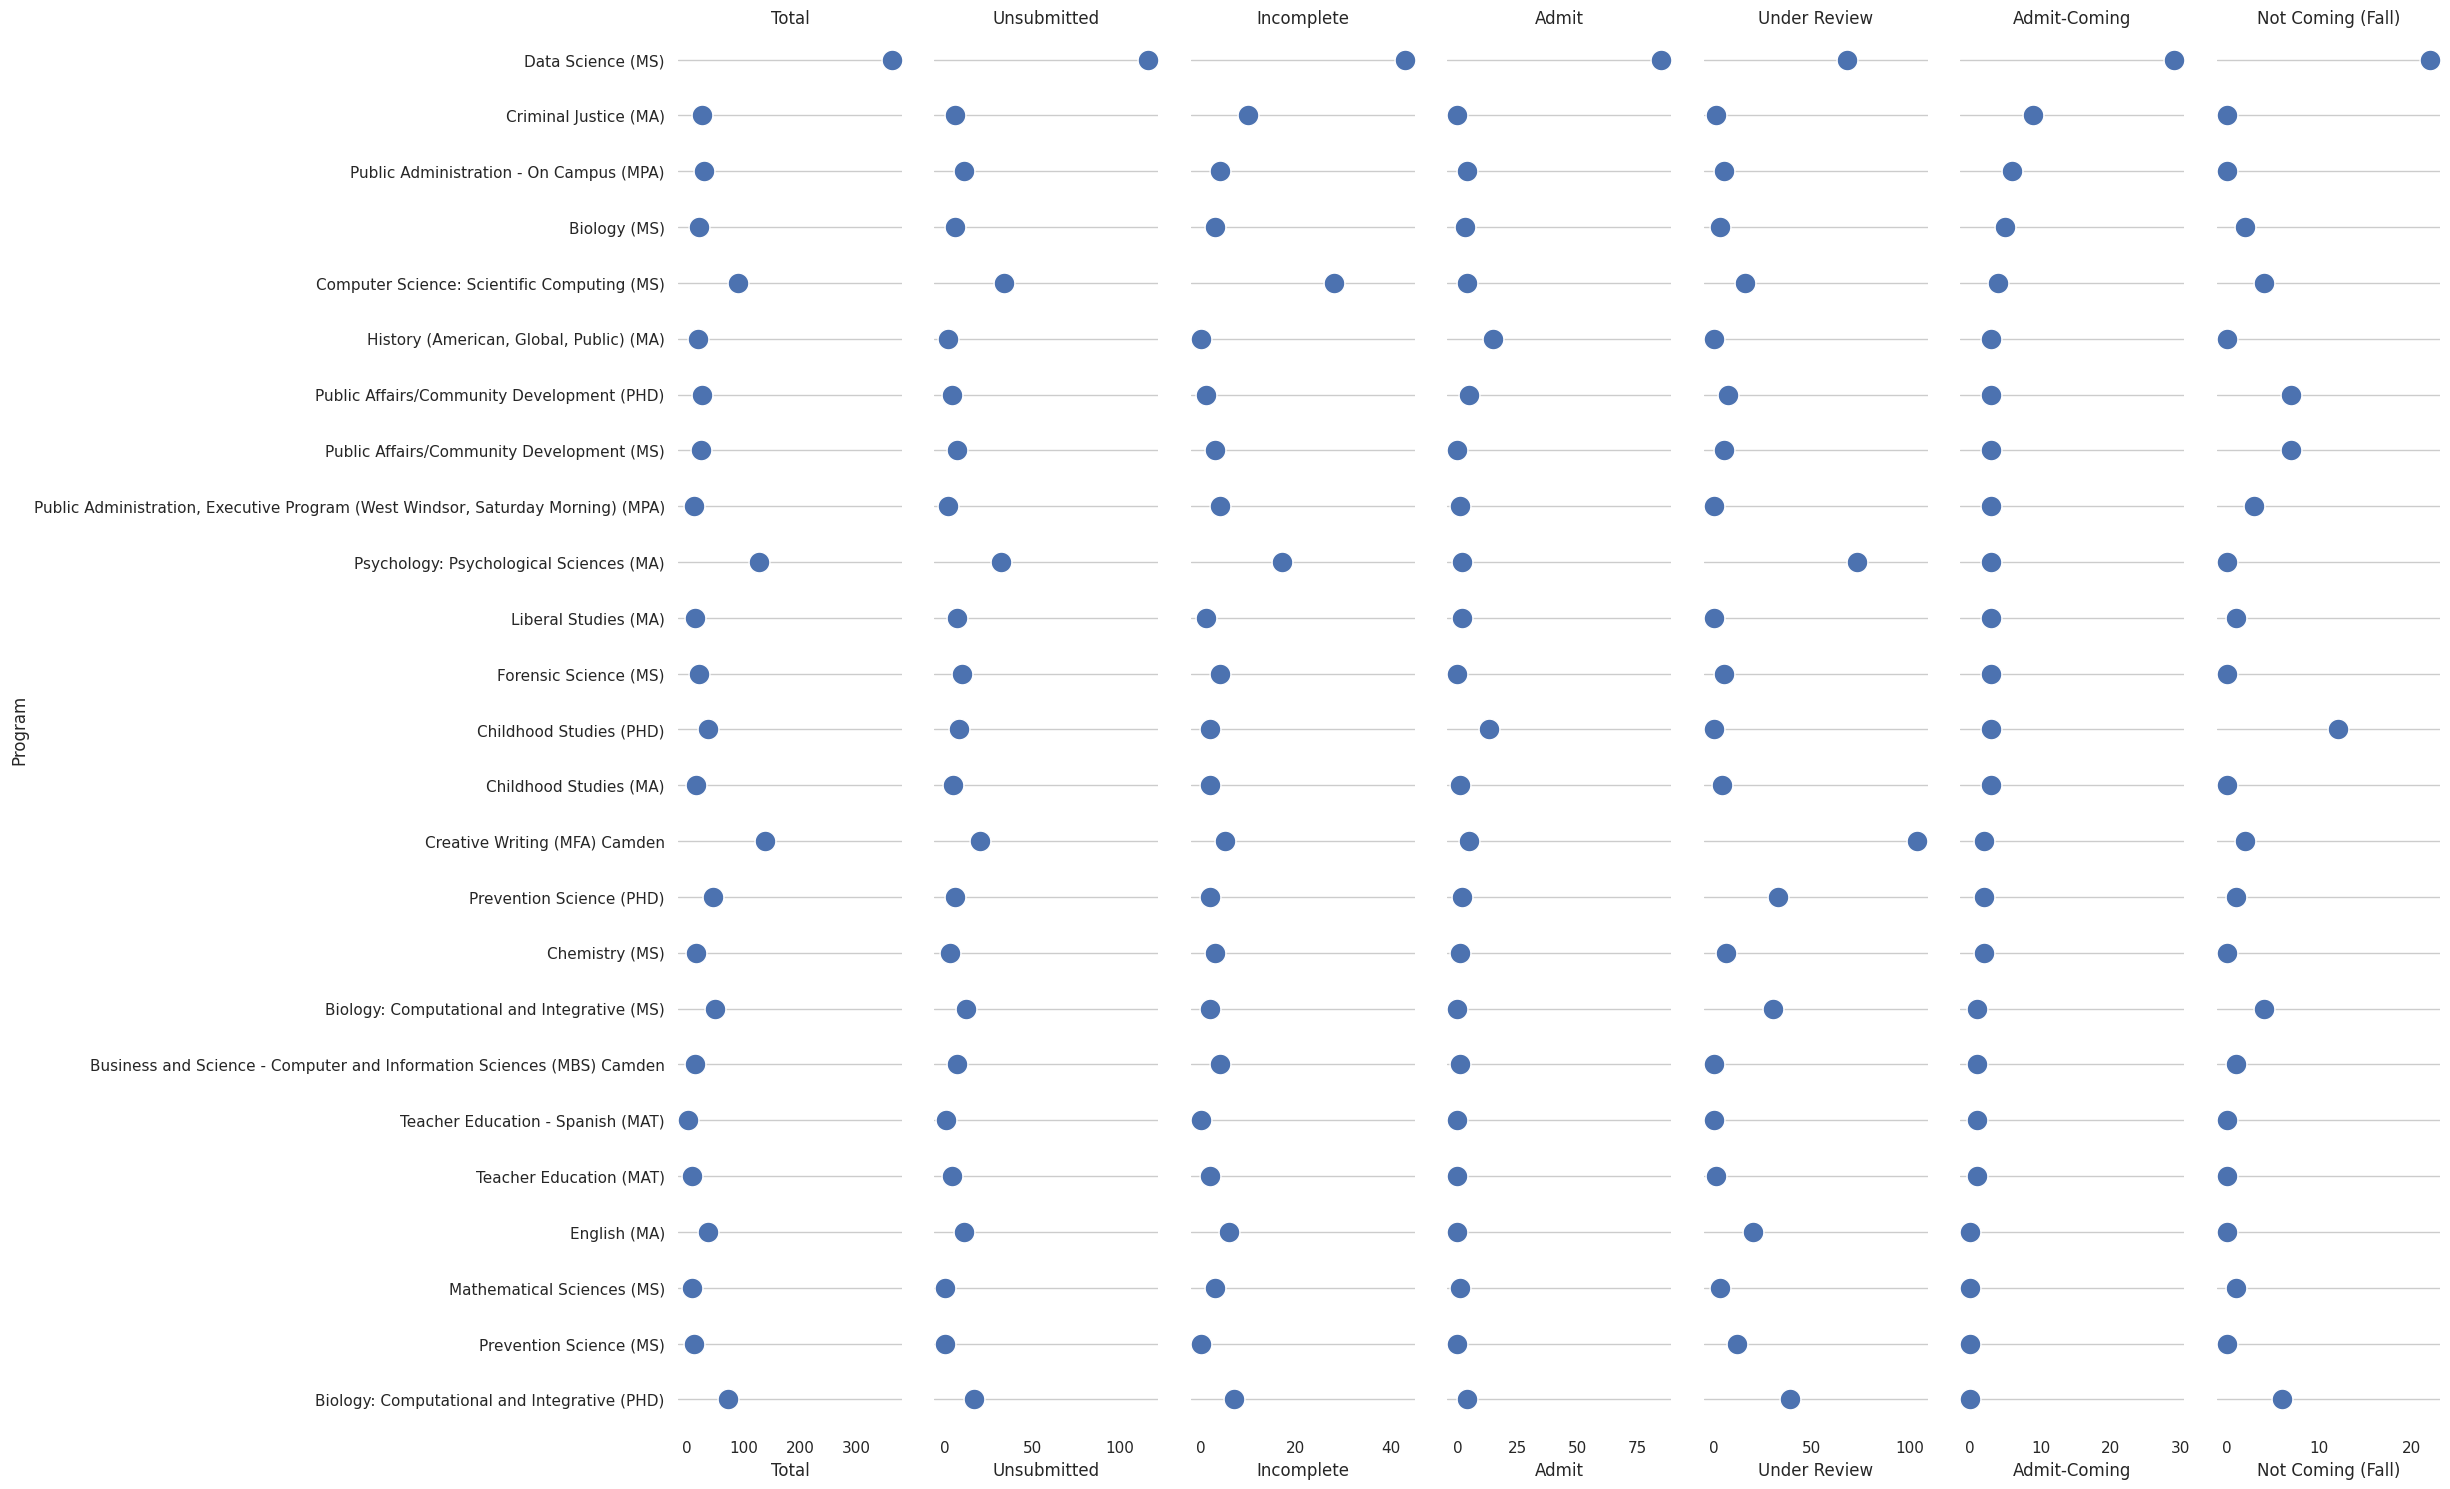

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Make the PairGrid
g = sns.PairGrid(programs.sort_values("Admit-Coming", ascending=False),
                 x_vars=programs.columns[:-1], y_vars=["Program"],
                 height=15, aspect=.18)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=15, orient="h", jitter=False,
      palette="bright", linewidth=1, edgecolor="w")

# Use semantically meaningful titles for the columns
titles = ['Total','Unsubmitted', 'Incomplete', 'Admit', 'Under Review',
       'Admit-Coming', 'Not Coming (Fall)']

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True);

It is so important to disaggregate the date in the work that I do. It is not important to have a lot of applications, the important number is the number of ACs. This graph helps to tell the story of the pipeline. It helps me to determine which graduate directors I need to push to make decisions and which programs need more applications. 

###Camden

In [ ]:
comps

,Index,Category,Count of ACs,Percent Change of ACs Over 2022,Change in Count of ACs Over 2022,Classification
0,1,First Year,286,15.8,39,Undergrad
1,2,Transfer,215,3.4,7,Undergrad
2,3,Law,37,-24.5,-12,Grad
3,4,Business,42,281.8,31,Grad
4,5,Graduate School,189,133.3,108,Grad
5,6,Nursing,12,-7.7,-1,Grad


In [ ]:
fig = px.scatter(comps, x="Percent Change of ACs Over 2022", y="Count of ACs",
                 symbol='Classification', color="Change in Count of ACs Over 2022",
                 size="Count of ACs", hover_data=['Category'],width=1100,height=500,
                 color_continuous_scale=px.colors.sequential.RdBu) #aok https://plotly.com/python/builtin-colorscales/ just playing, but sure which one is best
fig.update_layout(legend=dict(yanchor="top",xanchor="right"),
    title_text = 'Comparing Rutgers-Camden Admitted-Coming (AC) Students Across Variables') 

The visualization is so much more powerful. It is also cleaner and easier to interpret. 

Since I last ran this data, the undergrad numbers have continued to grow, but the graduate numbers sans the Graduate School have not grown much. 

### Rutgers (Grad Only)

In [ ]:
#aok havent seen yet to have y axis and size on same var, but seems to work well
fig = px.scatter(campcomps, x="Percent Change of ACs Over 2022", y="Count of Acs",
                 symbol='Campus', color="Change in Count of Acs Over 2022",
                 size="Count of Acs", hover_data=['School'],width=1100,height=500)
fig.update_layout(legend=dict(yanchor="top",xanchor="right"),
    title_text = 'Comparing Rutgers Graduate Schools Admitted-Coming (AC) Students Across Variables') 

This visualization is particularly helpful here. It's far easier to see the relationship without the outliers or focus in o nthe top performers. 

Not many graduate programs have more than 100 students committed and most of the astronomical growth is due to poor performance last year as much good performance this year. 

The Graduate School continues to keep pace within the top five schools. It will be difficult to move into the top three, but we may see some movement from the Law School in Newark later in the cycle. 

## Who Applied 

This section provides an analysis of who has has applied this cycle. 

###Age by Program

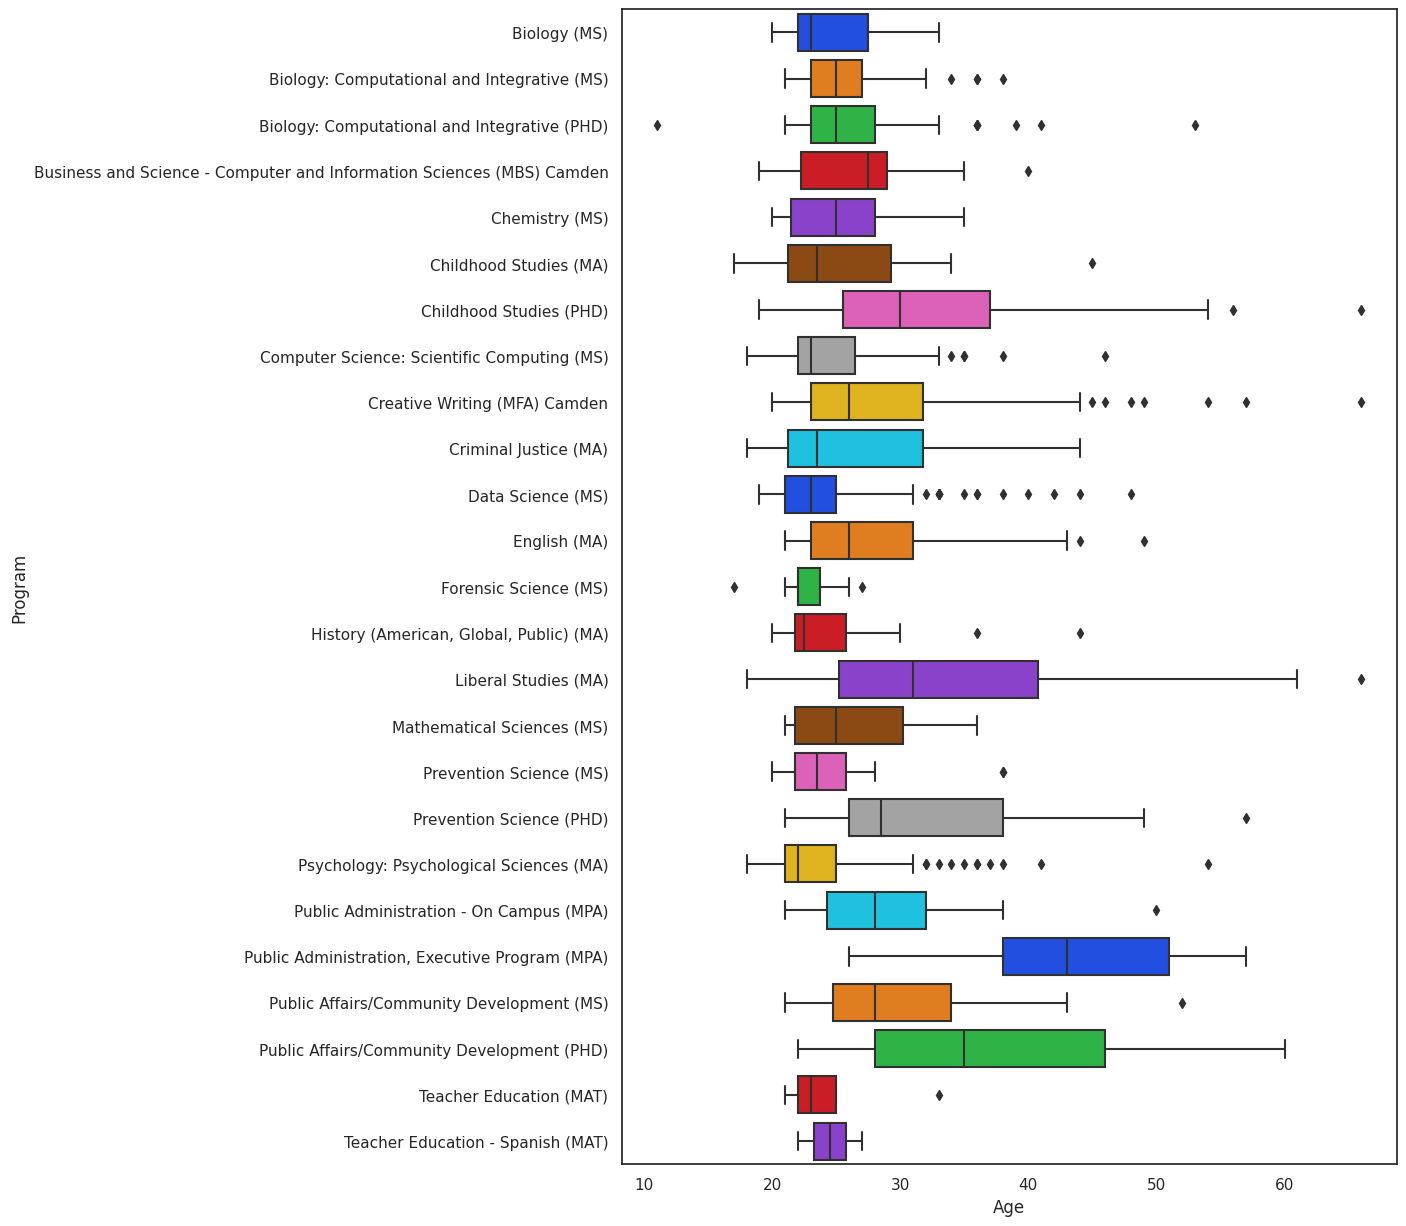

In [ ]:
fig, ax = plt.subplots(figsize=(10, 15))

import seaborn as sns
sns.set_theme(style="whitegrid")

my_order = fall.groupby(by=["Program"])["Age"].median('Age').iloc[::1].index
 
sns.boxplot(x='Age', y='Program', palette="bright", data=fall, order=my_order);

This is a great case for disaggregation of data. The EMPA figure is not surprising but the Data Science and Public Affairs numbers certainly are. 

### Gender by Program

0 Gender
Female    0.545455
Male      0.454545
Name: 0, dtype: float64


Text(0.2727272727272727, 0, '54 %')

Text(0.7727272727272727, 0, '45 %')

1 Gender
Female    0.56
Male      0.44
Name: 1, dtype: float64


Text(0.28, 1, '56 %')

Text(0.78, 1, '44 %')

2 Gender
Female    0.452055
Male      0.547945
Name: 2, dtype: float64


Text(0.22602739726027396, 2, '45 %')

Text(0.726027397260274, 2, '54 %')

3 Gender
Female    0.428571
Male      0.571429
Name: 3, dtype: float64


Text(0.21428571428571427, 3, '42 %')

Text(0.7142857142857142, 3, '57 %')

4 Gender
Female    0.466667
Male      0.533333
Name: 4, dtype: float64


Text(0.23333333333333334, 4, '46 %')

Text(0.7333333333333334, 4, '53 %')

5 Gender
Female    0.857143
Male      0.142857
Name: 5, dtype: float64


Text(0.42857142857142855, 5, '85 %')

Text(0.9285714285714285, 5, '14 %')

6 Gender
Female    0.846154
Male      0.153846
Name: 6, dtype: float64


Text(0.4230769230769231, 6, '84 %')

Text(0.9230769230769231, 6, '15 %')

7 Gender
Female    0.362637
Male      0.637363
Name: 7, dtype: float64


Text(0.1813186813186813, 7, '36 %')

Text(0.6813186813186813, 7, '63 %')

8 Gender
Female    0.644928
Male      0.355072
Name: 8, dtype: float64


Text(0.322463768115942, 8, '64 %')

Text(0.822463768115942, 8, '35 %')

9 Gender
Female    0.538462
Male      0.461538
Name: 9, dtype: float64


Text(0.2692307692307692, 9, '53 %')

Text(0.7692307692307692, 9, '46 %')

10 Gender
Female    0.311295
Male      0.688705
Name: 10, dtype: float64


Text(0.15564738292011018, 10, '31 %')

Text(0.6556473829201102, 10, '68 %')

11 Gender
Female    0.432432
Male      0.567568
Name: 11, dtype: float64


Text(0.21621621621621623, 11, '43 %')

Text(0.7162162162162162, 11, '56 %')

12 Gender
Female    0.681818
Male      0.318182
Name: 12, dtype: float64


Text(0.3409090909090909, 12, '68 %')

Text(0.8409090909090908, 12, '31 %')

13 Gender
Female    0.75
Male      0.25
Name: 13, dtype: float64


Text(0.375, 13, '75 %')

Text(0.875, 13, '25 %')

14 Gender
Female    0.785714
Male      0.214286
Name: 14, dtype: float64


Text(0.39285714285714285, 14, '78 %')

Text(0.8928571428571428, 14, '21 %')

15 Gender
Female    0.5
Male      0.5
Name: 15, dtype: float64


Text(0.25, 15, '50 %')

Text(0.75, 15, '50 %')

16 Gender
Female    0.916667
Male      0.083333
Name: 16, dtype: float64


Text(0.4583333333333333, 16, '91 %')

17 Gender
Female    0.73913
Male      0.26087
Name: 17, dtype: float64


Text(0.3695652173913043, 17, '73 %')

Text(0.8695652173913043, 17, '26 %')

18 Gender
Female    0.80315
Male      0.19685
Name: 18, dtype: float64


Text(0.4015748031496063, 18, '80 %')

Text(0.9015748031496064, 18, '19 %')

19 Gender
Female    0.433333
Male      0.566667
Name: 19, dtype: float64


Text(0.21666666666666667, 19, '43 %')

Text(0.7166666666666667, 19, '56 %')

20 Gender
Female    0.461538
Male      0.538462
Name: 20, dtype: float64


Text(0.23076923076923078, 20, '46 %')

Text(0.7307692307692308, 20, '53 %')

21 Gender
Female    0.583333
Male      0.416667
Name: 21, dtype: float64


Text(0.2916666666666667, 21, '58 %')

Text(0.7916666666666667, 21, '41 %')

22 Gender
Female    0.666667
Male      0.333333
Name: 22, dtype: float64


Text(0.3333333333333333, 22, '66 %')

Text(0.8333333333333333, 22, '33 %')

23 Gender
Female    0.625
Male      0.375
Name: 23, dtype: float64


Text(0.3125, 23, '62 %')

Text(0.8125, 23, '37 %')

24 Gender
Female    1.0
Male      NaN
Name: 24, dtype: float64


Text(0.5, 24, '100 %')

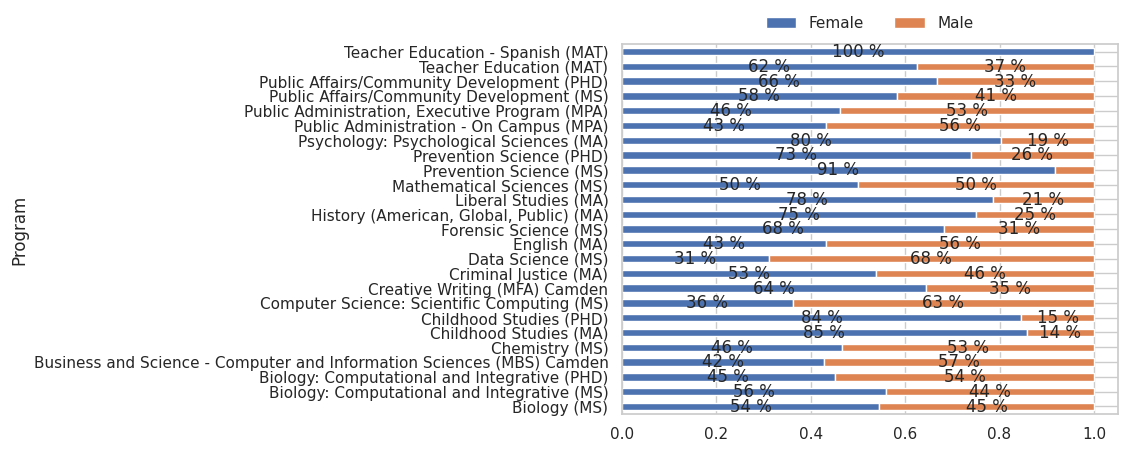

In [ ]:
_var, y_var = "Program", "Gender"
fall_grouped = fall.groupby("Program")["Gender"].value_counts(normalize=True).unstack(y_var)
fall_grouped.plot.barh(stacked=True).figsize=(25,25)
plt.legend(
        bbox_to_anchor=(0.5, 1.02),
        loc="lower center",
        borderaxespad=0,
        frameon=False,
        ncol=3,
    )
for ix, row in fall_grouped.reset_index(drop=True).iterrows():
        print(ix, row)
        cumulative = 0
        for element in row:
            if element > 0.1:
                plt.text(
                    cumulative + element / 2,
                    ix,
                    f"{int(element * 100)} %",
                    va="center",
                    ha="center",
                )
            cumulative += element;

### Home Country and State

(-0.5, 7499.5, 4999.5, -0.5)

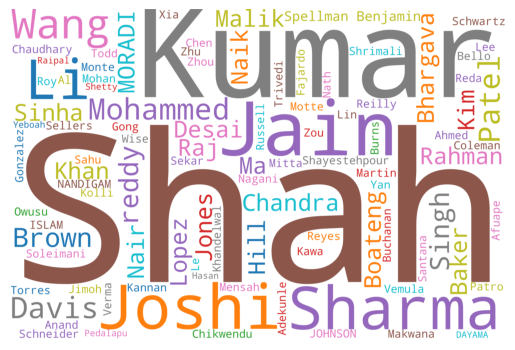

<Figure size 640x480 with 0 Axes>

In [ ]:
# Libraries
# aok import only once at the begining
# also wonder about first names :)
# totally can put sth like this on grad school website and/or posters etc
# wonder if color means anything? could make it by continent

from wordcloud import WordCloud
import matplotlib.pyplot as plt
 
# Create a list of word
text = " ".join(cat for cat in namel.LastName)
 
# Create the wordcloud object
wordcloud = WordCloud(width=7500, height=5000, max_font_size=10000, max_words=100, background_color="white",colormap="tab10").generate(text)
 
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()
plt.savefig('wordcloud.pdf')

The importance of this visualization is in that it helps us to understand who is driving the growth in applications. 

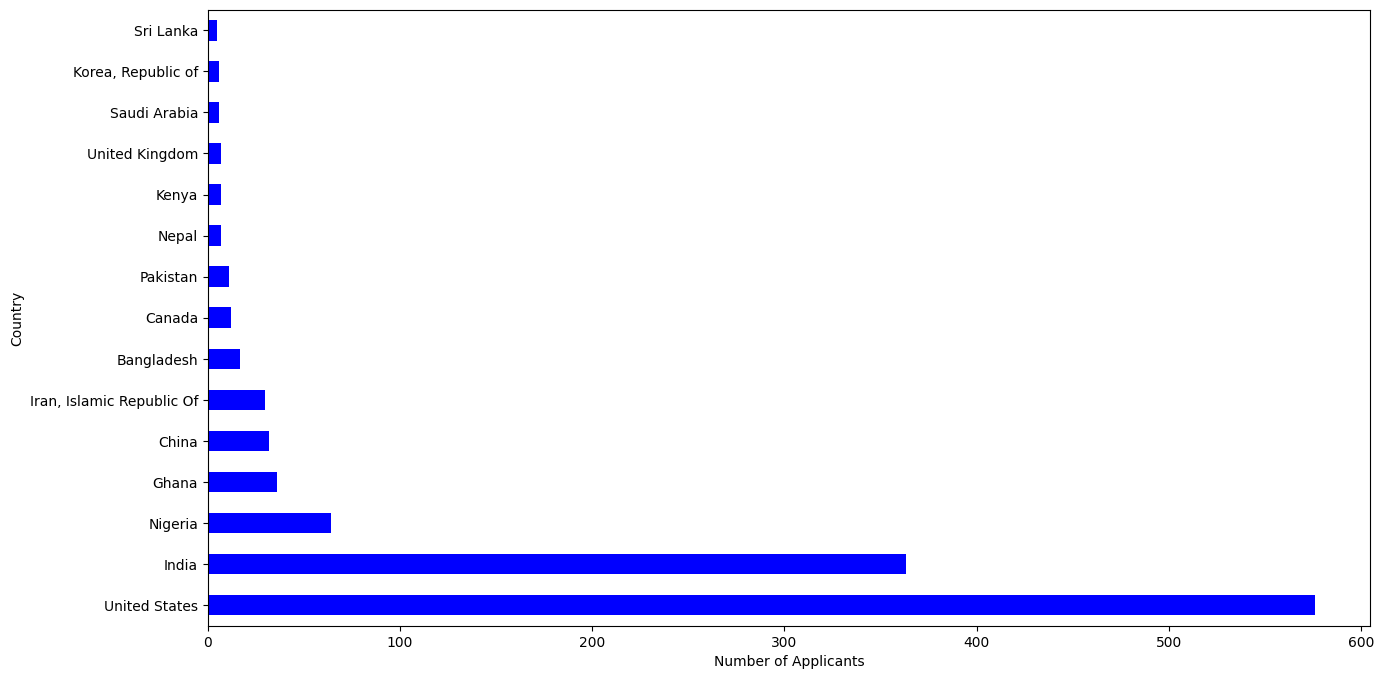

In [ ]:
fall.Country.value_counts().nlargest(15).plot(kind='barh',figsize=(15,8), color='blue')
plt.ylabel("Country")
plt.xlabel("Number of Applicants");

<AxesSubplot:>

Text(0, 0.5, 'State or Province')

Text(0.5, 0, 'Number of Applicants')

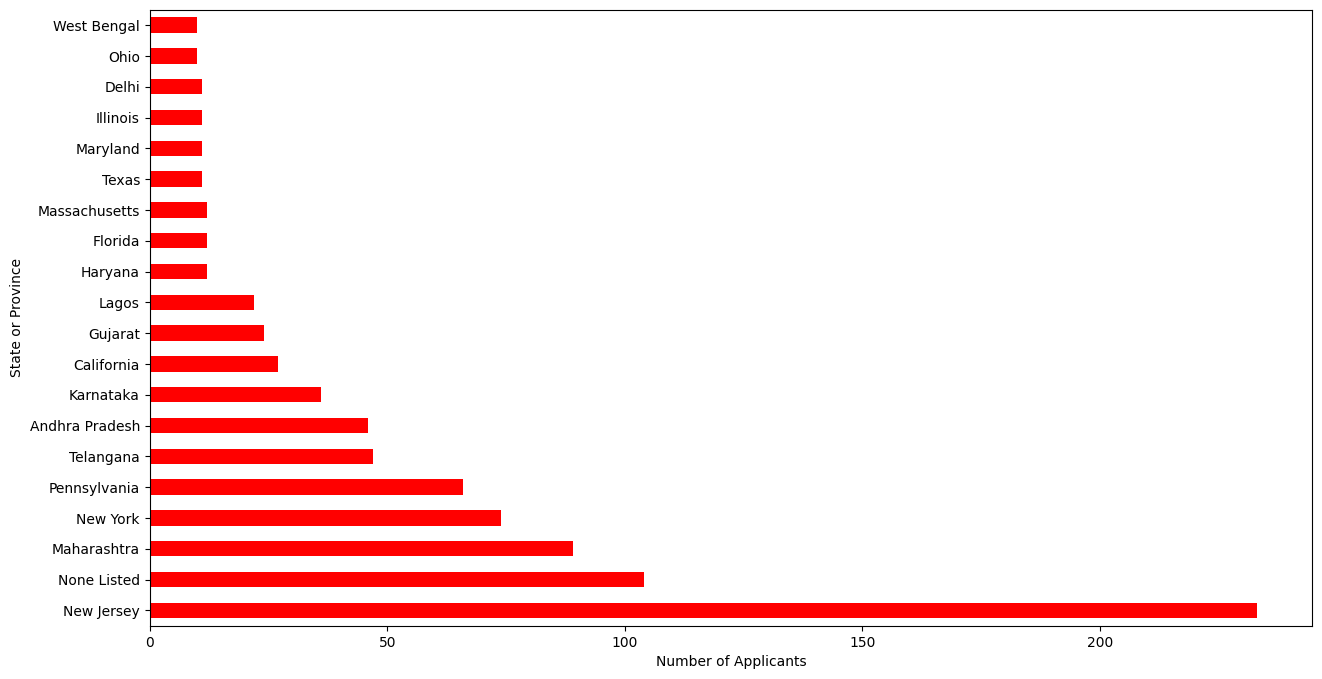

In [ ]:
fall.State.value_counts().nlargest(20).plot(kind='barh',figsize=(15,8), color='red')
plt.ylabel("State or Province")
plt.xlabel("Number of Applicants")

The lack of success in Pennsylvania continues to surprise me. 

### Race by Program

aok: these are applicants; wonder about admits may be very different
say maybe many asians apply but few come while for hispanics the other way round

In [ ]:
race[:].style.background_gradient(cmap="RdYlGn")

,Program,Biology (MS),Biology: Computational and Integrative (MS),Biology: Computational and Integrative (PHD),Business and Science - Computer and Information Sciences (MBS) Camden,Chemistry (MS),Childhood Studies (MA),Childhood Studies (PHD),Computer Science: Scientific Computing (MS),Creative Writing (MFA) Camden,Criminal Justice (MA),Data Science (MS),English (MA),Forensic Science (MS),"History (American, Global, Public) (MA)",Liberal Studies (MA),Mathematical Sciences (MS),Prevention Science (MS),Prevention Science (PHD),Psychology: Psychological Sciences (MA),Public Administration - On Campus (MPA),"Public Administration, Executive Program (MPA)",Public Affairs/Community Development (MS),Public Affairs/Community Development (PHD),Teacher Education - Spanish (MAT),Teacher Education (MAT)
0,Asian,10,22,25,8,6,2,10,63,15,5,298,7,3,0,1,4,3,8,31,3,2,6,6,0,0
1,White,5,10,23,2,1,4,12,5,79,8,11,12,8,15,9,2,2,18,53,14,4,9,6,0,7
2,Black or African American,4,12,14,4,6,5,11,14,19,6,22,13,7,3,3,1,5,16,21,13,6,9,11,1,1
3,None Identified,2,6,6,0,1,0,1,6,10,0,27,2,0,1,0,1,0,2,3,0,1,0,2,0,0
4,Two or More,0,0,4,0,1,2,3,2,11,1,5,1,2,1,1,0,1,2,12,0,0,0,2,1,0
5,Hispanic or Latino,1,0,1,0,0,1,2,1,4,6,0,2,2,0,0,0,1,0,7,0,0,0,0,0,0


What's fascinating here is how Asian student application growth is pushing application growth across so many programs. This is a piece of data I have shared with our marketing team. 